In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [8]:
df = pd.read_csv("arrhythmia.csv")
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.87139689578714 Mediana = 1.0 Desvio Padrão = 4.402816328048099


In [55]:
df = pd.read_csv("resultados_randomForest_0.csv")
df.head(5)

,strategy,k,n_estimators,max_depth,min_samples_split,min_samples_leaf,f1,elapsed_time
0,mean,228,6,4,5,14,0.377357,0.101573
1,mean,48,96,17,9,10,0.377357,0.726859
2,mean,188,91,1,4,6,0.377357,0.656017
3,mean,218,96,6,12,5,0.380297,0.883046
4,median,218,11,4,2,18,0.377357,0.137421


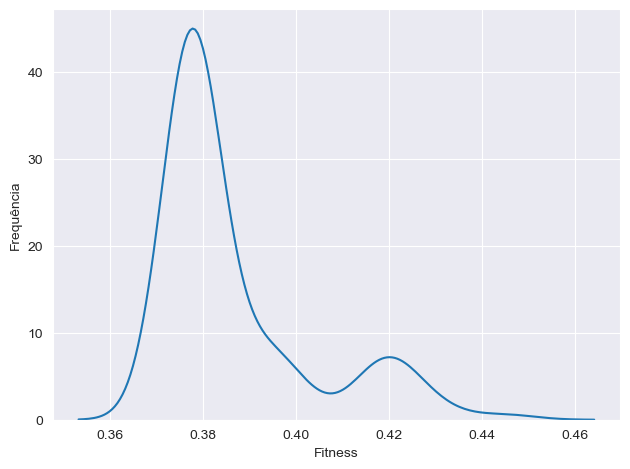

In [56]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

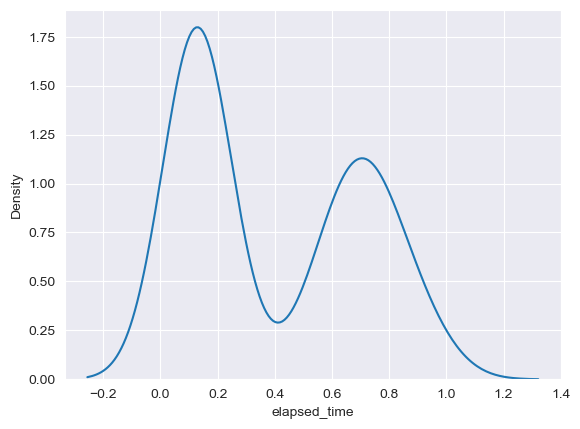

In [57]:
sns.kdeplot(df, x="elapsed_time")

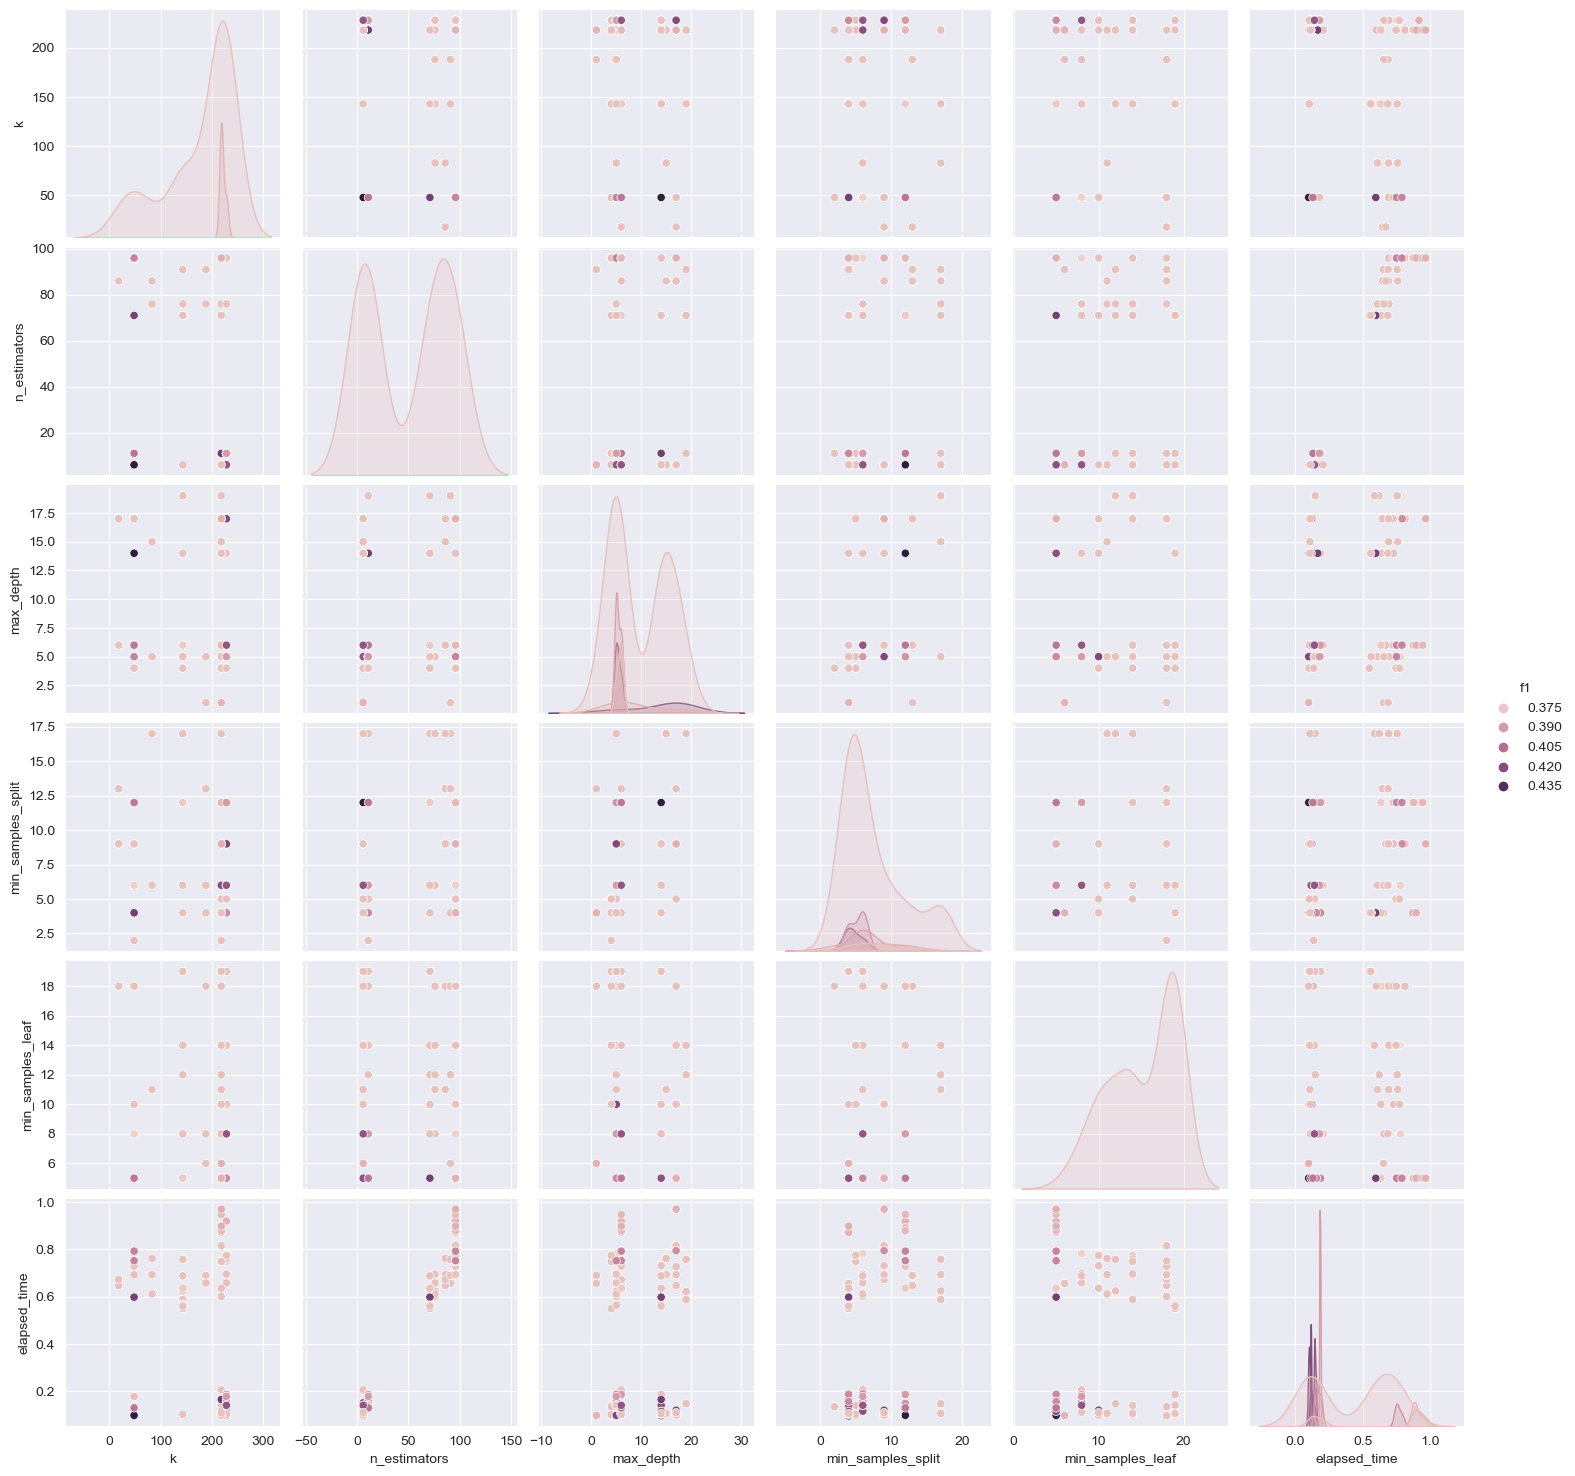

In [58]:
#X = df.to_numpy()[:, :-2]
# converter o vetor para o formato one-hot enconding
# UMP -> https://umap-learn.readthedocs.io/en/latest/basic_usage.html
# t-SNE -> https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [59]:
X = df.to_numpy()[:, :-2]

X

array([['mean', 228, 6, 4, 5, 14],
       ['mean', 48, 96, 17, 9, 10],
       ['mean', 188, 91, 1, 4, 6],
       ['mean', 218, 96, 6, 12, 5],
       ['median', 218, 11, 4, 2, 18],
       ['most_frequent', 228, 76, 5, 6, 8],
       ['most_frequent', 18, 86, 6, 13, 18],
       ['median', 143, 71, 19, 17, 12],
       ['median', 218, 6, 14, 4, 19],
       ['median', 83, 86, 15, 17, 11],
       ['mean', 228, 11, 4, 5, 14],
       ['mean', 218, 6, 14, 4, 19],
       ['mean', 228, 96, 4, 5, 14],
       ['mean', 228, 6, 14, 4, 19],
       ['median', 218, 11, 19, 17, 12],
       ['most_frequent', 228, 11, 5, 6, 8],
       ['most_frequent', 18, 86, 17, 13, 18],
       ['mean', 143, 71, 19, 17, 14],
       ['median', 218, 76, 5, 6, 18],
       ['median', 48, 11, 4, 2, 18],
       ['median', 143, 76, 5, 17, 12],
       ['median', 218, 96, 17, 9, 18],
       ['mean', 218, 96, 6, 4, 5],
       ['median', 218, 6, 6, 12, 5],
       ['mean', 228, 6, 5, 5, 14],
       ['median', 83, 76, 5, 6, 11],
     

In [60]:
#converter o vetor para o formato one-hot encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [61]:
#t-SNE
X_embedded = TSNE(n_components=2).fit_transform(X_encoded)

X_embedded

array([[ 3.930523  , -7.244646  ],
       [ 8.071195  , -1.8340937 ],
       [-1.1869236 , -3.9841537 ],
       [ 3.3351982 , -0.1154721 ],
       [-5.559535  ,  5.7904534 ],
       [-7.3297815 , -0.6200994 ],
       [-2.8989358 , -5.818887  ],
       [-2.762874  ,  8.987242  ],
       [ 3.1765082 ,  6.0620017 ],
       [-2.7121153 ,  5.585039  ],
       [ 3.161519  , -7.4850006 ],
       [ 4.5676875 ,  6.4662538 ],
       [ 2.864893  , -6.506607  ],
       [ 4.6067233 ,  7.366676  ],
       [-2.9619243 ,  7.99245   ],
       [-6.4390683 , -1.3852535 ],
       [-2.706907  , -5.7170115 ],
       [-2.144132  ,  9.693035  ],
       [-6.66874   ,  3.1152725 ],
       [-5.5892825 ,  5.80154   ],
       [-3.7196133 ,  8.843668  ],
       [ 5.784599  , -3.1744013 ],
       [ 3.6016765 ,  0.9933229 ],
       [ 1.0856272 ,  1.9463458 ],
       [ 4.562438  , -6.6784124 ],
       [-7.053902  ,  2.91475   ],
       [-2.995435  ,  8.772848  ],
       [-1.7192303 ,  5.49321   ],
       [-2.7116296 ,